In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from colicoords import RDistModel, PSF, Memory
from colicoords import CellListPlot, save, load, SynthCellList, CellPlot, Cell, Data
from colicoords.synthetic_data import draw_poisson, add_readout_noise
from colicoords.iplot import iter_subplots, IterCellPlot, AutoIterCellPlot
from colicoords.support import running_mean
from tqdm import tqdm_notebook
import numpy as np

In [2]:
lengths = np.random.normal(40, 7.5, 100)
radii = np.random.normal(8, 0.4, 100)
curvatures = np.random.normal(0, 0.0075, 100)

cell_list = SynthCellList(lengths, radii, curvatures)

In [15]:
lengths = np.random.normal(40, 7.5, 100)
radii = np.random.normal(8, 0.4, 100)
curvatures = np.random.normal(0, 0.0075, 100)

cl = SynthCellList(lengths, radii, curvatures)

In [8]:
data = np.loadtxt('brightfield_r_dist.txt')
x_out, y_out = data.T

In [16]:
type(cl[23])

colicoords.synthetic_data.SynthCell

In [18]:
save('temp.hdf5', cells)

In [4]:
cells = load('temp.hdf5')

In [16]:
isinstance(cl[23], Cell)

True

In [18]:
cells[99] = cl[23]

In [22]:
cl[23].name

'Cell_23'

In [24]:
cells[99].name = 'Cell_99'

In [17]:
cl[23].data.names

['binary']

In [19]:
psf = PSF(sigma=1.54)
rm = RDistModel(psf, r='equal', mem=Memory(verbose=0))

#cells = cell_list.copy()

flu_ints = list(np.random.normal(100, 20, size=len(cells)))
st_num = list(np.random.normal(10, 5, size=len(cells)))
st_ints = list(np.random.normal(200, 50, size=len(cells)))

for cell in tqdm_notebook(cells[99:]):
    a1 = 1 - 0.15*np.random.rand()
    a2 = 1 - a1
    pars = {'a1': a1, 'a2': a2, 'r':cell.coords.r}
    img = cell.gen_radial_model_data(rm, pars)
    img *= (flu_ints.pop() / img.max())
    cell.data.add_data(img, 'fluorescence', 'cytosol')
    
    
    st_int = st_ints.pop()
    storm_table = cell.gen_storm_membrane(int(st_num.pop()), cell.coords.r, r_std=0.25, intensity_mean=st_int, intensity_std=5*np.sqrt(st_int))
    cell.data.add_data(storm_table, 'storm')
    storm_img = cell.gen_flu_from_storm('storm', sigma_std=0.3)
    cell.data.add_data(storm_img, 'fluorescence', 'foci')
    
    final_img = np.clip(img + storm_img, 0, None)
    poisson = draw_poisson(final_img)
    noise = add_readout_noise(poisson, 2)

    cell.data.add_data(noise, 'fluorescence', 'fluorescence')
    
    
    bf_img = np.interp(cell.coords.rc, x_out, y_out)
    cell.data.add_data(bf_img, 'brightfield')

<IPython.core.display.Javascript object>


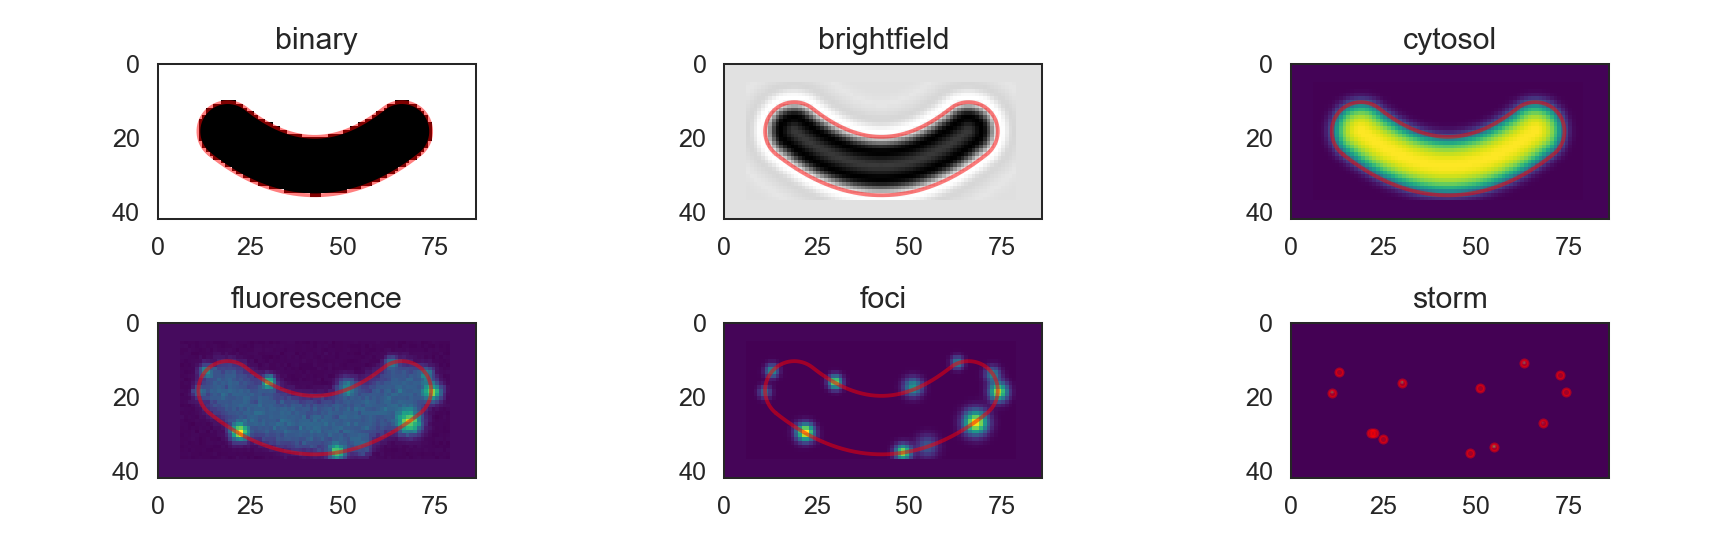

In [20]:
acip = AutoIterCellPlot(cells)
acip.plot()

In [25]:
save('temp_save_new_synthcells.hdf5', cells)

<IPython.core.display.Javascript object>


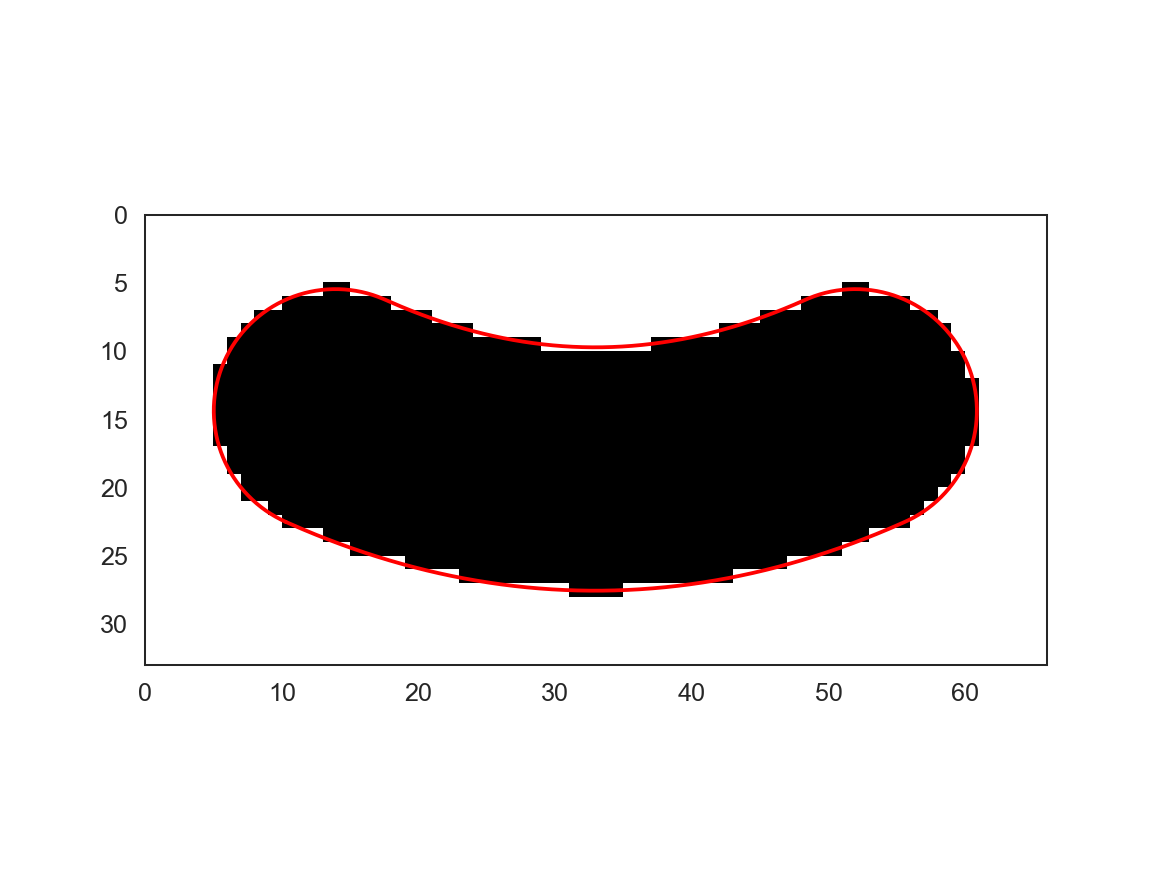

In [10]:
fig = plt.figure()
cp = CellPlot(cells[98])
cp.imshow('binary')
cp.plot_outline()

<IPython.core.display.Javascript object>


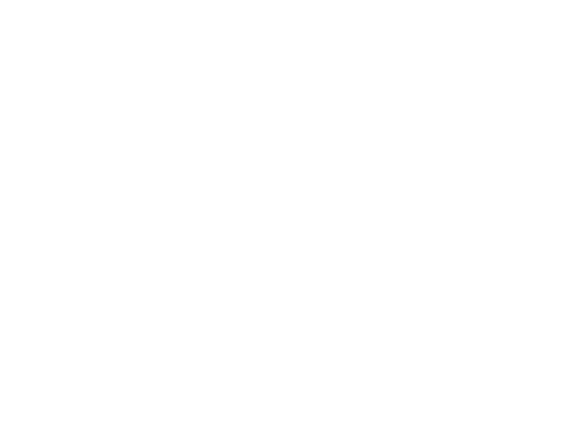

IndexError: list index out of range

In [23]:
fig, axes = iter_subplots()
cp = IterCellPlot(cells[:2])
cp.imshow('brightfield')
cp.plot_storm(alpha=0.2)
cp.plot_outline(alpha=0.2)

fig.display()

In [43]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

In [42]:
def angle_between(data):
    xmid = data.shape[1] / 2
    ymid = data.shape[0] / 2
    
    storm = data_r.data_dict['storm_1']
    v1 = storm['x'][0] - xmid, storm['y'][0] - ymid

    storm = data_r.data_dict['storm_2']
    v2 = storm['x'][0] - xmid, storm['y'][0] - ymid
    
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [44]:
data = cells_no_flu[0].data.copy()

In [45]:
angle_between(data)

1.8414722925840212

In [46]:
angle_between(data.rotate(20))

2.1562672375213197

In [36]:
np.arctan2(y1-y2 , x1-x2)

-2.6022156547936697

In [39]:
20%360

20

In [37]:
data = data_r.copy()


data_r = data.rotate(20)

storm = data_r.data_dict['storm_1']
x1, y1 = storm['x'], storm['y']

storm = data_r.data_dict['storm_2']
x2, y2 = storm['x'], storm['y']

np.arctan2(y1-y2 , x1-x2)


STORMTable([-2.2531498])

In [38]:
(-2.6022156547936697 + 2.2531498)*(180/np.pi)

-20.0000002518037

In [15]:
data_r = cell_list[0].data.copy()

data_r = data_r.rotate(90)
flu = data_r.data_dict['fluorescence']
storm = data_r.data_dict['storm']
x, y = storm['x'], storm['y']

nc = Cell(data_r, init_coords=True)
x_fl = np.sum(nc.coords.x_coords * flu) / np.sum(flu)
y_fl = np.sum(nc.coords.y_coords * flu) / np.sum(flu)

print(x[0], x_fl, n_equal(x[0], x_fl))
print(y[0], y_fl, n_equal(y[0], y_fl))


KeyError: 'fluorescence'

In [120]:
def n_equal(d1, d2):
    i = 0
    while i < 50:
        if d1 // 1 != d2 // 1:
            break
        i += 1
        d1 = d1 * 10 % 10
        d2 = d2 * 10 % 10
        
    return i - 1

In [121]:
n_equal(2.000002, 2.000002)

49

In [108]:
6.989604218533273 * 10 % 10 // 1

9.0

In [103]:
6.989604218533273 // 1

6.0

In [148]:
print(x, x_fl)
print(y, y_fl)

[6.93946926] 6.936427093590804
[19.84954649] 19.672086522412613


In [140]:
from symfit import Fit, Parameter, Variable, exp

In [144]:
def make_model(x_mu_val, y_mu_val):

    sig_x = 1.54
    sig_y = 1.54
    x_mu = Parameter(name='x_mu', value=x_mu_val)
    y_mu = Parameter(name='y_mu', value=y_mu_val)
    b = Parameter(name='b', value=200)
    x_var = Variable(name='x_var')
    y_var = Variable(name='y_var')
    z_var = Variable(name='z_var')

    model = {z_var: exp(-( ((x_var-x_mu)**2/(2*sig_x**2)) + ((y_var-y_mu)**2 / (2*sig_y**2)) )) + b}
    return model

In [145]:
xx, yy = nc.coords.x_coords, nc.coords.y_coords

model = make_model(x, y)
fit = Fit(model, x_var=xx, y_var=yy, z_var=flu)
res = fit.execute()

In [147]:
print(res)


Parameter Value        Standard Deviation
b         2.728664e-07 2.052898e-06
x_mu      6.936160e+00 7.696742e-05
y_mu      1.967199e+01 7.696743e-05
Fitting status message: Optimization terminated successfully.
Number of iterations:   12
Regression Coefficient: 0.9999972062060312



<IPython.core.display.Javascript object>


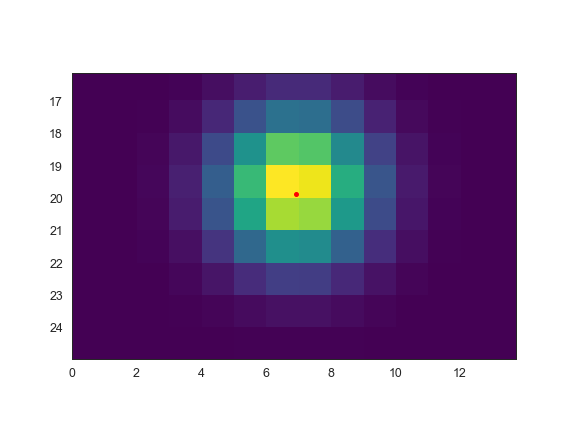

In [138]:
plt.figure()
cp = CellPlot(nc)
cp.imshow('fluorescence')
cp.plot_storm()

<IPython.core.display.Javascript object>


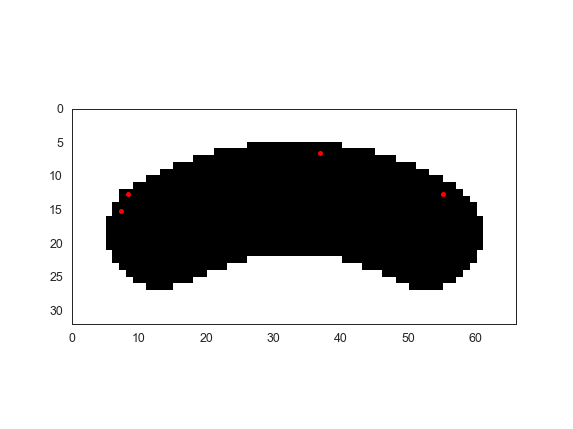

In [51]:
plt.figure()
cp = CellPlot(cell_list[3])
cp.imshow('fluorescence')
cp.imshow('binary')
cp.plot_storm(method='plot')

In [75]:
save('fake_data_new.hdf5', cell_list)